In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import numpy as np

In [2]:
gdf = gpd.read_file('mandals_population_2020.geojson')
gdf['mean_pop'] = gdf['zonalstat'].apply(lambda d: d['mean'])
df = pd.read_csv('fires_telangala.csv', parse_dates=['acq_date'])

### Distribution of crop fires

Within the validation timeframe, 35% of observations are classified as crop fires.
Keep in mind that this might be biased downwards or upwards. But it should serve
as a good point of reference.

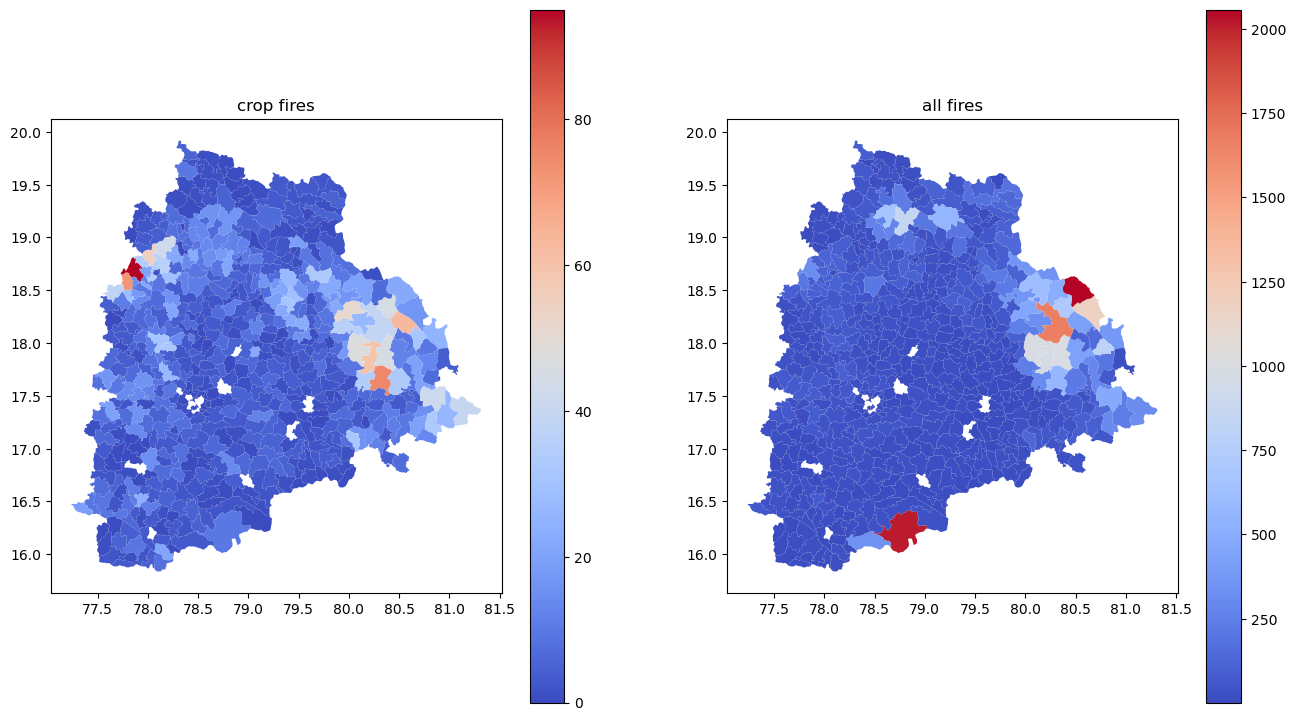

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 9))

total_crop_fires_validation = df.groupby('mandal')['agricultural'].sum().astype('float')
total_fires = df.groupby('mandal')['acq_date'].count().astype('float')

gdf.join(total_crop_fires_validation).plot(column='agricultural', cmap='coolwarm', legend=True, ax=ax[0])
gdf.join(total_fires).plot(column='acq_date', cmap='coolwarm', legend=True, ax=ax[1]);
ax[0].set_title('crop fires')
ax[1].set_title('all fires');

### Cropland distribution

The majority of the land is cropland. Land usage data from 2021

Percentage of cropland: 64.1%


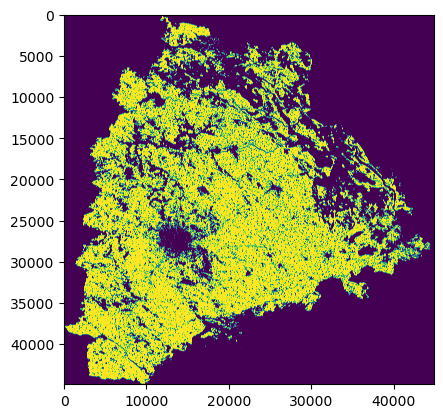

In [4]:
fp = r'land_usage.tif'
img = rasterio.open(fp).read()
img = img.reshape(img.shape[1:])

perc_cropland = (img == 5).mean()/(img != 0).mean()

print(f'Percentage of cropland: {perc_cropland*100:.1f}%')

# 11 labels, see: https://www.arcgis.com/home/item.html?id=d3da5dd386d140cf93fc9ecbf8da5e31
# lobel 5 is cropland
plt.imshow(img == 5)

### Seasonality in the data

<AxesSubplot: xlabel='acq_date'>

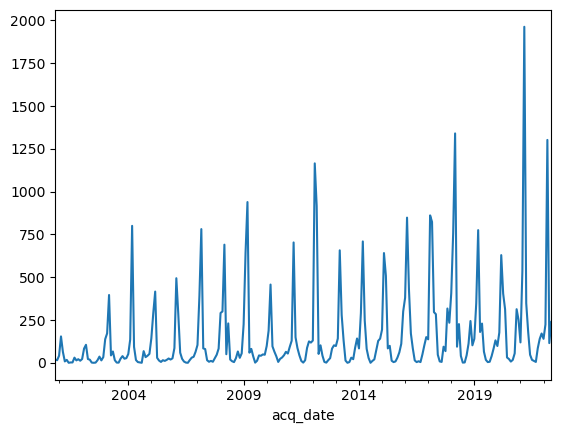

In [5]:
mask = df['mandal'] == total_crop_fires_validation.idxmax()
df.set_index('acq_date').groupby(pd.Grouper(freq='1M'))['brightness'].count().plot()